In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

os.listdir( '../../All_data_sets/dl/' )

['.ipynb_checkpoints', 'Churn_Modelling.csv', 'heart.csv']

In [3]:
# Load dataset
url = '../../All_data_sets/dl/heart.csv'
data = pd.read_csv(url)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106.0,0,1.9,1,3,2,0


In [4]:
data.shape

(1025, 14)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Separate features and target
X = data.drop('target', axis=1).values
y = data['target'].values

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train.shape

(820, 13)

In [11]:
# Build ANN model
model = Sequential()

# add the input layer and 1st hidden layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Hidden layer 1
model.add(Dense(32, activation='relu'))  # Hidden layer 2
model.add(Dense(16, activation='relu'))  # Hidden layer 3
model.add(Dense(1, activation='sigmoid'))  # Output layer

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5495 - loss: 0.7007 - val_accuracy: 0.5244 - val_loss: 0.6931
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5207 - loss: 0.6932 - val_accuracy: 0.5244 - val_loss: 0.6927
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4845 - loss: 0.6937 - val_accuracy: 0.5244 - val_loss: 0.6925
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5209 - loss: 0.6927 - val_accuracy: 0.5244 - val_loss: 0.6922
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4908 - loss: 0.6941 - val_accuracy: 0.5244 - val_loss: 0.6923
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5280 - loss: 0.6923 - val_accuracy: 0.5244 - val_loss: 0.6923
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 0.6934 - val_accuracy: 0.5244 - val_loss: 0.6922
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4859 - loss: 0.6943 - val_accuracy: 0.5244 - val_loss

In [15]:
X_test.shape

(205, 13)

In [16]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4888 - loss: 0.6938 
Test Accuracy: 50.24%


In [17]:
len( history.history['accuracy'] )

50

### accuracy plot

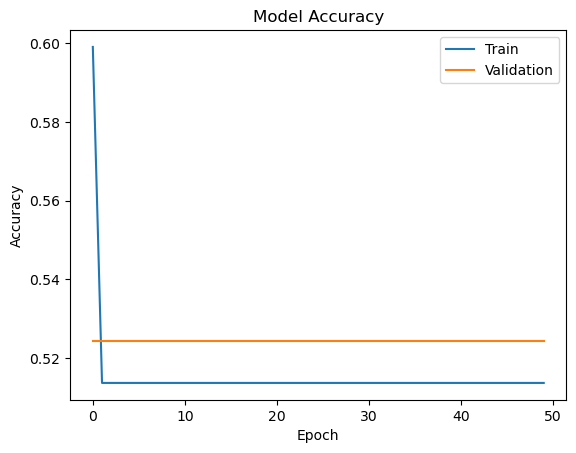

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()


### loss plot

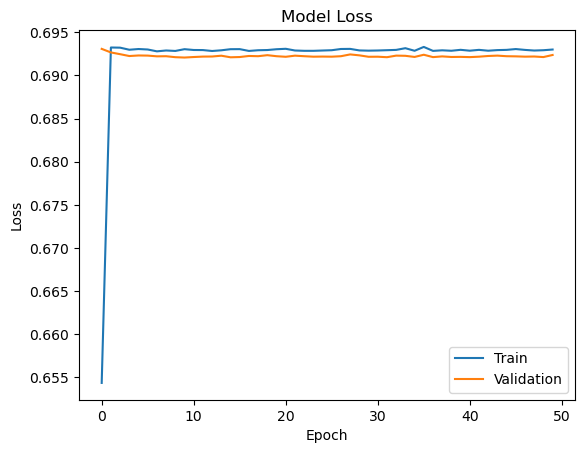

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.show()
